In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFdr 
# FDR = False Discovery Rate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('../bases_dados/ad.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [7]:
data.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1554    0
1555    0
1556    0
1557    0
1558    0
Length: 1559, dtype: int64

In [8]:
data.shape

(3279, 1559)

In [12]:
x = data.iloc[:, 0:1558].values
x.shape

(3279, 1558)

In [15]:
y = data.iloc[:, 1558].values
y.shape, y

((3279,),
 array(['ad.', 'ad.', 'ad.', ..., 'nonad.', 'nonad.', 'nonad.'],
       dtype=object))

In [16]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 459, 2820], dtype=int64))

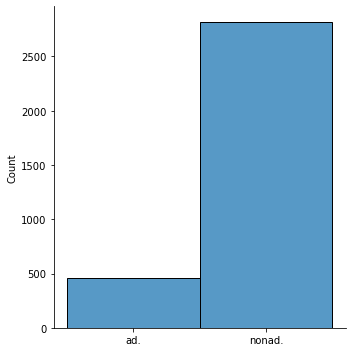

In [17]:
import seaborn as sns

sns.displot(y);

In [18]:
naive1 = GaussianNB().fit(x, y)
previsoes1 = naive1.predict(x)

accuracy_score(y, previsoes1)

0.7813357731015553

In [20]:
selecao = SelectFdr(chi2, alpha=0.01)
novo_x = selecao.fit_transform(x, y)

x.shape, novo_x.shape

((3279, 1558), (3279, 433))

In [22]:
selecao.pvalues_, len(selecao.pvalues_)

(array([2.14710304e-268, 0.00000000e+000, 8.98165813e-150, ...,
        6.03353380e-041, 5.63437216e-012, 9.37945775e-002]),
 1558)

In [23]:
np.sum(selecao.pvalues_ <= 0.01)

476

In [24]:
colunas = selecao.get_support()
colunas

array([ True,  True,  True, ...,  True,  True, False])

In [25]:
indices = np.where(colunas == True)
indices

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [26]:
naive2 = GaussianNB().fit(novo_x, y)
previsoes2 = naive2.predict(novo_x)

accuracy_score(y, previsoes2)

0.970722781335773